In [96]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sn

In [97]:
#helper function to read file
def readFile(fileName):
    with open(fileName) as f:
        reader = csv.reader(f, delimiter="\t")
        d = list(reader)
    return d


In [98]:
file = readFile("cryptocurrency_prices.txt")
data = file

# Row 1: Bitcoin      (p = 6.14e-13)
# Row 2: Dash         (p = 2.17e-02)
# Row 3: Ethereum     (p = 6.31e-04)
# Row 4: Litecoin     (p = 6.32e-07)
# Row 5: Monero       (p = 6.41e-03)
# Row 6: Nem          (p = 3.63e-01)
# Row 7: Ripple       (p = 1.04e-03)

N = len(data) # Number of crypto currencies
T = len(data[0])-1 # Number of time steps in returns


R = np.zeros((N, T)) # Matrix de returns de 7 X 928
for j in range(N):
    b = data[j]

    # Log-returns
    for i in range(len(b)-1):
        den = float(b[i])
        num = float(b[i+1])
        R[j][i] = np.log(num/den)


# Standardizing data by subtracting mean and dividing by std. dev.

X = np.zeros((N, T))
for i in range(N):
    X[i] = (R[i]-np.mean(R[i]))/(np.std(R[i]))
    
# La matrix tiene que estar rows = variables columns = observations [al parecer en MATLAB es al revex por eso transp]
C = np.corrcoef(R)


triang = int(((N*N)-N)/2)

values_C = np.zeros(triang)
count = 0
for j in range(N):
    for h in range(j+1,N):
        values_C[count] = C[j][h]
        count = count+1

Text(51.0, 0.5, 'cryptocurrency #')

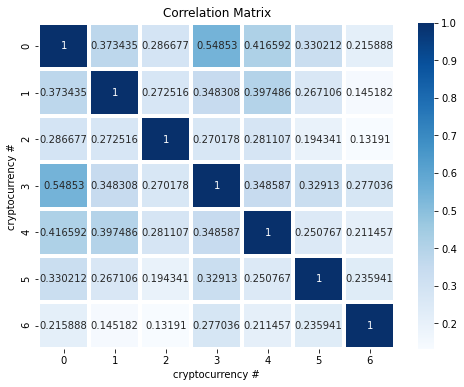

In [99]:
plt.figure(figsize=(8,6))
sn.heatmap(C,annot=True,linewidths=3,cmap='Blues', fmt='g',annot_kws={"size": 10}) # checa que esta el cont aqui
plt.title('Correlation Matrix')
plt.xlabel("cryptocurrency #")
plt.ylabel("cryptocurrency #")

In [100]:
# <<<<<<<<<<<<<<<<<<<<<<<<<< Testing significance of correlations >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

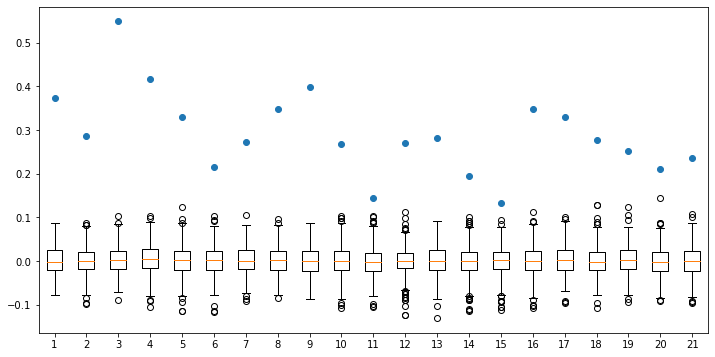

In [101]:
# We will shuffle the order of each time series and check correlations between them, to see if the correlations
# Above are significant or not

Nsamples = 500 # Number of shuffles
X_shuff = np.zeros((N, T))

# queremos guardar (N*N)-N)/2 values porque son los valores de la upper triang part de C matrix
# no nos interesa la lower triang porque es igual ni la diagonal de unos

triang = int(((N*N)-N)/2)
values = np.zeros((triang, Nsamples)) 

for k in range(Nsamples):
    for i in range(N):
        rand = X[i][np.random.permutation(T)] # Checa bootstrap en tail Fitting DS si no entiendes esta parte
        X_shuff[i] = rand

    C_shuff = np.corrcoef(X_shuff)

    count = 0
    for j in range(N):
        for h in range(j+1,N):
            values[count][k] = C_shuff[j][h]
            count = count+1


x = np.arange(triang)+1
plt.figure(figsize=(12,6))
plt.boxplot(np.transpose(values[:]))
plt.plot(x,values_C,"o")

# We can observe that all the correlation values are statistically significant

In [ ]:
# <<<<<<<<<<<<<<<<<<<<<<<<<< PCA [Principal Component Analysis] >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [129]:
# Eigenvalues and eigenvectors: in the commands below L has
# the eigenvalues of C, which are then sorted in descending order
# V is the NxN matrix of the
# eigenvectors: its n-th row is the eigenvector of the n-th eigenvalue
# [En Matlab los eigenv son las columnas, se nos hizo mas facil asi con las rows]

from numpy import linalg as LA

L, V = LA.eig(C)
#L = np.sort(L)[::-1]
sorted_ind = np.argsort(L)
sorted_ind = np.flip(sorted_ind) # porque los queremos en descending order

L = L[sorted_ind]
V = np.transpose(V)
V = V[sorted_ind]

In [130]:
# Los eigenvalues suman a 7, por eso dividimos c/u entre N y por 100 para sacar %
for i in range(N):
    print("Eigenvalue ", i+1," = ", L[i], " Explains ", L[i]/N*100, "% of the variance")

Eigenvalue  1  =  2.80642553931667  Explains  40.091793418809566 % of the variance
Eigenvalue  2  =  0.9330175172593885  Explains  13.328821675134122 % of the variance
Eigenvalue  3  =  0.7825671954869765  Explains  11.179531364099663 % of the variance
Eigenvalue  4  =  0.7408897605084546  Explains  10.584139435835064 % of the variance
Eigenvalue  5  =  0.7035217537268889  Explains  10.050310767526984 % of the variance
Eigenvalue  6  =  0.5960544559354103  Explains  8.515063656220146 % of the variance
Eigenvalue  7  =  0.4375237777662149  Explains  6.250339682374499 % of the variance


In [131]:
# Solo imprimimos los primeros dos eigenvectors
for i in range(N):
    print("Cp.", i+1, "of 1st Eigenvector = ", V[0][i]," Cp.", i+1, "of 2nd Eigenvector = ", V[1][i])

Cp. 1 of 1st Eigenvector =  -0.45169743231073506  Cp. 1 of 2nd Eigenvector =  0.05264008297653608
Cp. 2 of 1st Eigenvector =  -0.38698694626810537  Cp. 2 of 2nd Eigenvector =  0.3304686325132724
Cp. 3 of 1st Eigenvector =  -0.31526278751260517  Cp. 3 of 2nd Eigenvector =  0.39119581304111684
Cp. 4 of 1st Eigenvector =  -0.4405294093980496  Cp. 4 of 2nd Eigenvector =  -0.10344724333370861
Cp. 5 of 1st Eigenvector =  -0.40261449463718046  Cp. 5 of 2nd Eigenvector =  0.21125549981592304
Cp. 6 of 1st Eigenvector =  -0.3448457928198271  Cp. 6 of 2nd Eigenvector =  -0.3227253682085268
Cp. 7 of 1st Eigenvector =  -0.2678370684010629  Cp. 7 of 2nd Eigenvector =  -0.7586194426766181


In [ ]:
# Computing principal components
# Los principal components estan perfectamente anti correlated, porque cada uno agrega
# completamente nueva informacion

#for i in range(N):
    